# Udactity Data Analyst

## Multivariate Visualizations Excercises, Part 2

### Scatterplots

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


### Plot Matrices
To look at the relationship between many pairs of variables, rather than generating these bivariate plots one by one, a preliminary option you might consider for exploration is the creation of a plot matrix. In a plot matrix, a matrix of plots is generated. Each row and column represents a different variable, and a subplot against those variables is generated in each plot matrix cell. This contrasts with faceting, where rows and columns will subset the data, and the same variables are depicted in each subplot.

Seaborn's `PairGrid` class facilitates the creation of this kind of plot matrix.

By default, `PairGrid` only expects to depict numeric variables; a typical invocation of PairGrid plots the same variables on the horizontal and vertical axes. On the diagonals, where the row and column variables match, a histogram is plotted. Off the diagonals, a scatterplot between the two variables is created.

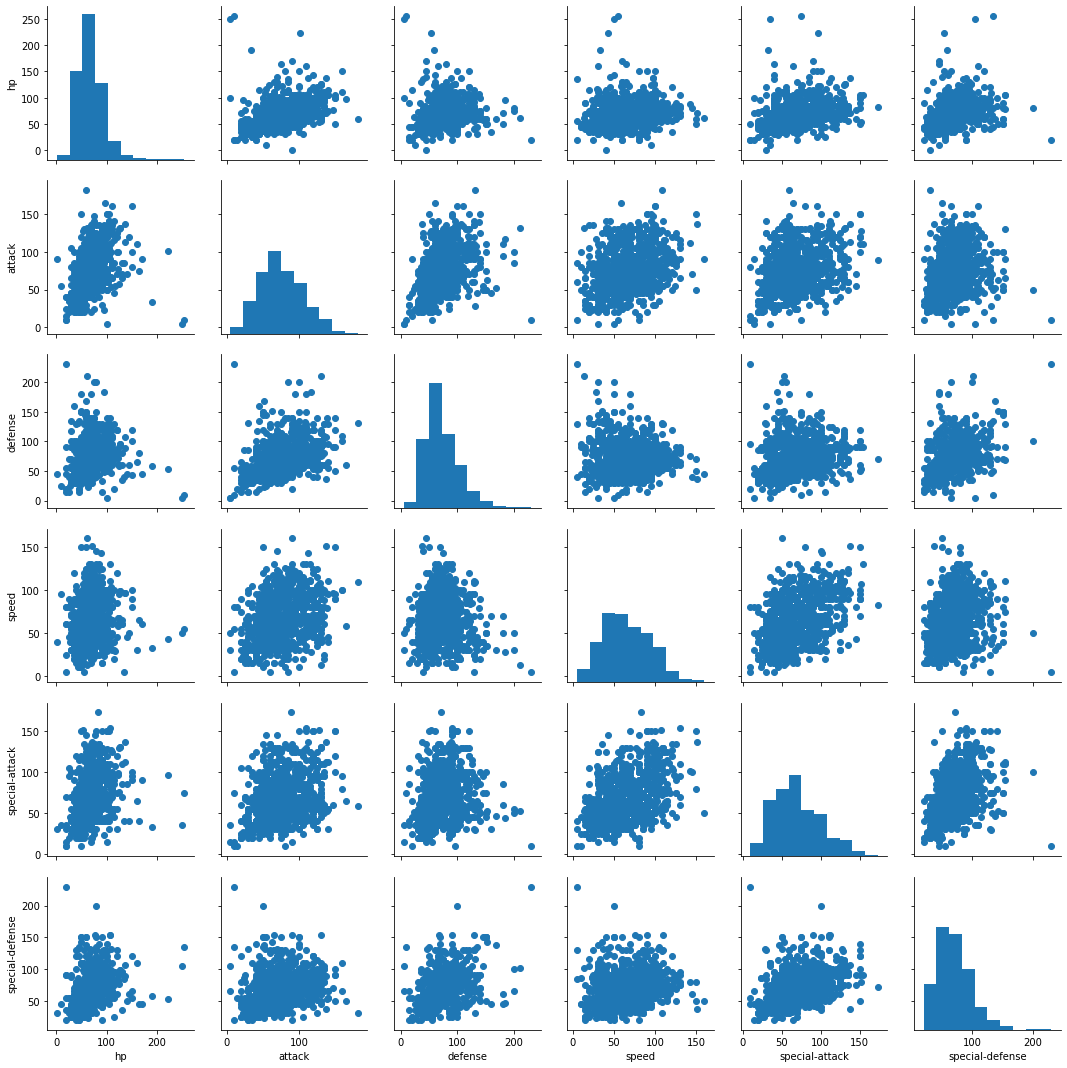

In [4]:
pkmn_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
g = sb.PairGrid(data = pokemon, vars = pkmn_stats);
g = g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

If we want to look at the relationship between the numeric and categorical variables in the data, we need to set the different variable types on the rows and columns, then use an appropriate plot type for all matrix cells.

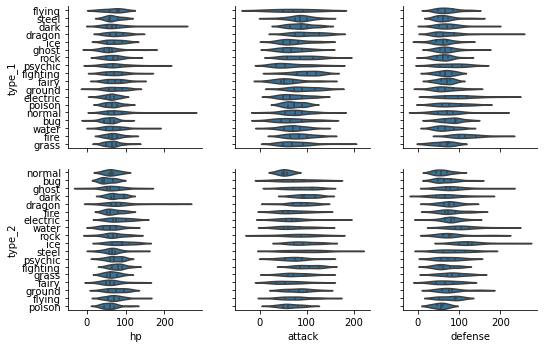

In [8]:
g = sb.PairGrid(data = pokemon, x_vars = ['hp', 'attack', 'defense'],
               y_vars = ['type_1', 'type_2']);
g.map(sb.violinplot, inner = 'quartile');

The time it takes to render the plot depends on the number of data points you have and the number of variables you want to plot. Increasing the number of variables increases the number of plots that need to be rendered in a quadratic fashion. One recommended approach is to take a random subset of the data to plot in the plot matrix instead. Use the plot matrix to identify interesting variable pairs, and then follow it up with individual plots on the full data.

### Correlation Matrices

For numeric variables, it can be useful to create a correlation matrix as part of your exploration. While it's true that the `.corr` function is perfectly fine for computing and returning a matrix of correlation coefficients, it's not too much trouble to plot the matrix as a heat map to make it easier to see the strength of the relationships.

In [5]:
pokemon[pkmn_stats].corr()

,hp,attack,defense,speed,special-attack,special-defense
hp,1.000000,0.433318,0.231540,0.169512,0.377446,0.367949
attack,0.433318,1.000000,0.435514,0.335289,0.325937,0.202138
defense,0.231540,0.435514,1.000000,-0.023866,0.199560,0.508688
speed,0.169512,0.335289,-0.023866,1.000000,0.440411,0.202847
special-attack,0.377446,0.325937,0.199560,0.440411,1.000000,0.481345
special-defense,0.367949,0.202138,0.508688,0.202847,0.481345,1.000000


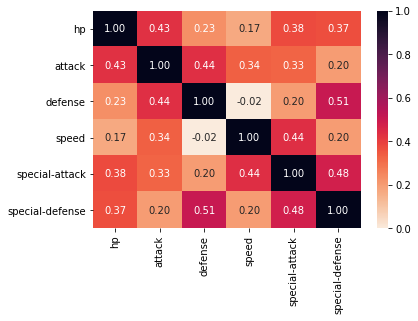

In [7]:
sb.heatmap(pokemon[pkmn_stats].corr(), cmap = 'rocket_r', annot = True, fmt = '.2f', vmin = 0);

### Feature Engineering

Feature engineering is a tool that we can leverage as we explore and learn about our data. As we explore a dataset, we might find that two variables are related in some way. Feature engineering is all about creating a new variable with a sum, difference, product, or ratio between those original variables that may lend a better insight into the research questions we seek to answer.

In [10]:
pokemon['atk_ratio'] = pokemon['attack'] / pokemon['special-attack']
pokemon['def_ratio'] = pokemon['defense'] / pokemon['special-defense']

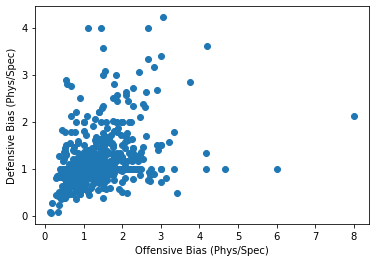

In [11]:
plt.scatter(data = pokemon, x = 'atk_ratio', y = 'def_ratio')
plt.xlabel('Offensive Bias (Phys/Spec)')
plt.ylabel('Defensive Bias (Phys/Spec)');

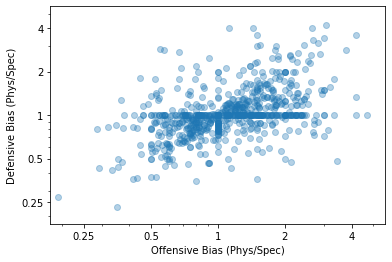

In [13]:
plt.scatter(data = pokemon, x = 'atk_ratio', y = 'def_ratio', alpha = 1/3)
plt.xlabel('Offensive Bias (Phys/Spec)')
plt.ylabel('Defensive Bias (Phys/Spec)')
plt.xscale('log')
plt.yscale('log')
tick_loc = [0.25, 0.5, 1, 2, 4]
plt.xticks(tick_loc, tick_loc)
plt.yticks(tick_loc, tick_loc)
plt.xlim(2 ** -2.5, 2 ** 2.5)
plt.ylim(2 ** -2.5, 2 ** 2.5);

Another way that we can perform feature engineering is to use the `cut` function to divide a numeric variable into ordered bins. When we split a numeric variable into ordinal bins, it opens it up to more visual encodings. For example, we might facet plots by bins of a numeric variable, or use discrete color bins rather than a continuous color scale. This kind of discretization step might help in storytelling by clearing up noise, allowing the reader to concentrate on major trends in the data. 